In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Data Information

In [65]:
fuel = pd.read_csv('Updated_CO2_Ratings.csv')
print(len(fuel))
print(len(fuel.columns))
fuel.head()

26146
15


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0


In [66]:
fuel.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,26146.000000,7155.000000,6045.000000
mean,2009.578521,3.353894,5.842806,13.886250,10.030341,12.151182,24.856613,276.079400,4.663312,4.675434
std,7.711948,1.341563,1.796811,3.742191,2.595455,3.189644,6.690478,65.827543,1.636609,1.790629
min,1995.000000,0.800000,2.000000,4.000000,3.900000,4.000000,10.000000,94.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,11.300000,8.300000,10.000000,20.000000,230.000000,4.000000,3.000000
50%,2010.000000,3.000000,6.000000,13.400000,9.600000,11.700000,24.000000,269.000000,5.000000,5.000000
75%,2016.000000,4.200000,8.000000,16.000000,11.400000,13.900000,28.000000,315.000000,6.000000,6.000000
max,2022.000000,8.400000,16.000000,33.300000,22.100000,27.500000,71.000000,633.000000,10.000000,8.000000


In [67]:
# Check for NAs
fuel.isna().sum()

Model Year                               0
Make                                     0
Model                                    0
Vehicle Class                            0
Engine Size(L)                           0
Cylinders                                0
Transmission                             0
Fuel Type                                0
Fuel Consumption (City (L/100 km)        0
Fuel Consumption(Hwy (L/100 km))         0
Fuel Consumption(Comb (L/100 km))        0
Fuel Consumption(Comb (mpg))             0
CO2 Emissions(g/km)                      0
CO2 Rating                           18991
Smog Rating                          20101
dtype: int64

In [68]:
# Number of unique values
fuel.nunique()

Model Year                             28
Make                                   90
Model                                4695
Vehicle Class                          33
Engine Size(L)                         63
Cylinders                               9
Transmission                           30
Fuel Type                               5
Fuel Consumption (City (L/100 km)     238
Fuel Consumption(Hwy (L/100 km))      167
Fuel Consumption(Comb (L/100 km))     209
Fuel Consumption(Comb (mpg))           57
CO2 Emissions(g/km)                   379
CO2 Rating                             10
Smog Rating                             7
dtype: int64

# Pre-processing & Cleaning

In [69]:
# Pre-processing (Convert some car make data to correct string format)
fuel['Make'] = fuel['Make'].apply(lambda x: x.title())
fuel['Vehicle Class'] = fuel['Vehicle Class'].apply(lambda x: x.title())
fuel['Model'] = fuel['Model'].apply(lambda x: x.title())
# fuel = fuel.iloc[:,:-2]
fuel.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,Ilx,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6.0,3.0
1,2022,Acura,Mdx Sh-Awd,Suv: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4.0,5.0
2,2022,Acura,Rdx Sh-Awd,Suv: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5.0,6.0
3,2022,Acura,Rdx Sh-Awd A-Spec,Suv: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5.0,6.0
4,2022,Acura,Tlx Sh-Awd,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5.0,7.0


In [70]:
fuel['Vehicle Class'].sort_values().unique()

array(['Compact', 'Full-Size', 'Mid-Size', 'Minicompact', 'Minivan',
       'Pickup Truck - Small', 'Pickup Truck - Standard',
       'Pickup Truck: Small', 'Pickup Truck: Standard',
       'Special Purpose Vehicle', 'Station Wagon - Mid-Size',
       'Station Wagon - Small', 'Station Wagon: Mid-Size',
       'Station Wagon: Small', 'Subcompact', 'Suv', 'Suv - Small',
       'Suv - Standard', 'Suv: Small', 'Suv: Standard', 'Two-Seater',
       'Ul', 'Van - Cargo', 'Van - Passenger', 'Van: Passenger'],
      dtype=object)

In [71]:
# Group the vehicle classes together
fuel['Vehicle Class 1'] = fuel['Vehicle Class']
fuel.loc[fuel['Vehicle Class'].str.contains('Suv'),'Vehicle Class 1'] = 'SUV'
fuel.loc[fuel['Vehicle Class'].str.contains('Pickup'),'Vehicle Class 1'] = 'Pickup Truck'
fuel.loc[fuel['Vehicle Class'].str.contains('Station'),'Vehicle Class 1'] = 'Station Wagon'
fuel.loc[fuel['Vehicle Class'].str.contains('Van'),'Vehicle Class 1'] = 'Van'

# There's a vehicle class called 'UL' with only 1 record. So, drop it from the data
fuel = fuel[fuel['Vehicle Class 1'] != 'Ul']

In [72]:
print(len(fuel))

26145


In [73]:
# Try grouping transmission types together
fuel['Transmission Type'] = fuel['Transmission'].apply(lambda x: re.findall('([A-Z]+)', x)[0])
fuel['Transmission Type'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

In [74]:
# Create a 'Car Name' feature based on car brand & car model first name
fuel['Car Name'] = fuel['Make'] + ' ' + fuel['Model'].apply(lambda x: x.split()[0])
fuel['Car Name'].head(10)

0            Acura Ilx
1            Acura Mdx
2            Acura Rdx
3            Acura Rdx
4            Acura Tlx
5            Acura Tlx
6            Acura Tlx
7            Acura Tlx
8    Alfa Romeo Giulia
9    Alfa Romeo Giulia
Name: Car Name, dtype: object

# Exploratory Data Analysis

In [ ]:
fuel['CO2 Emissions(g/km)'].hist()

<AxesSubplot:>

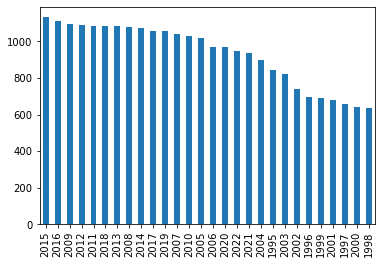

In [12]:
# Check for counts within each column
fuel['Model Year'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

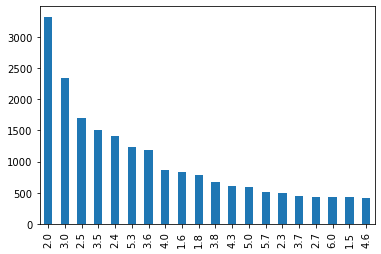

In [13]:
# Check for counts within each column
fuel['Engine Size(L)'].value_counts().iloc[:20].plot(kind = 'bar')

<AxesSubplot:>

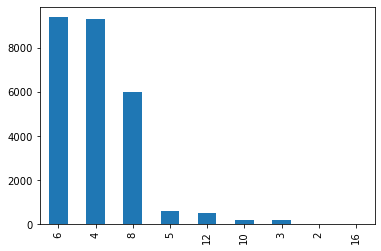

In [14]:
fuel['Cylinders'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

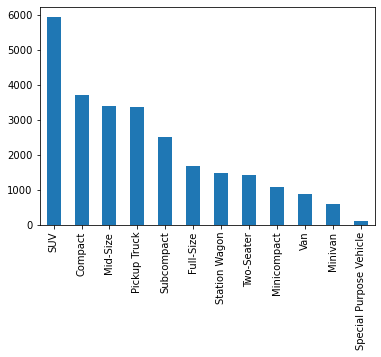

In [15]:
fuel['Vehicle Class 1'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

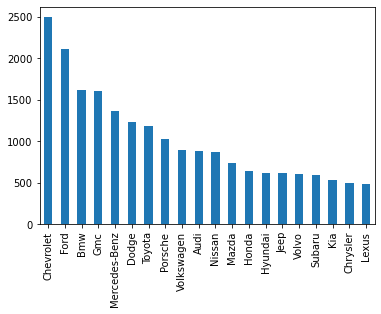

In [16]:
fuel['Make'].value_counts().iloc[:20].plot(kind = 'bar')

<AxesSubplot:>

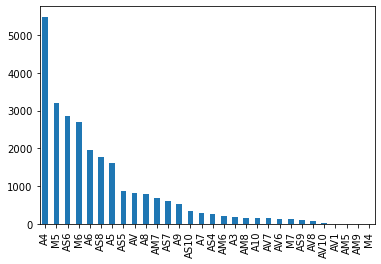

In [17]:
fuel['Transmission'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

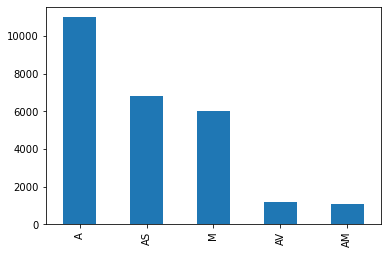

In [18]:
fuel['Transmission Type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

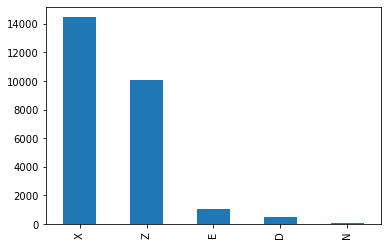

In [19]:
fuel['Fuel Type'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

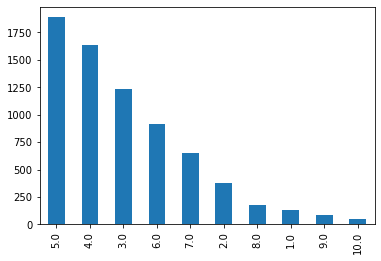

In [20]:
fuel['CO2 Rating'].value_counts().plot(kind = 'bar')

In [21]:
fuel.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating', 'Vehicle Class 1',
       'Transmission Type', 'Car Name'],
      dtype='object')

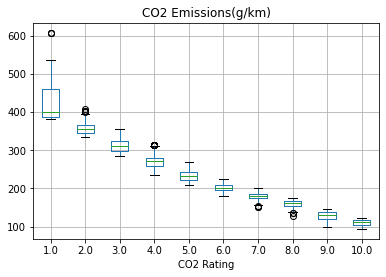

In [22]:
# Relation between CO2 emissions & CO2 rating?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'CO2 Rating')
plt.suptitle('')
plt.show()

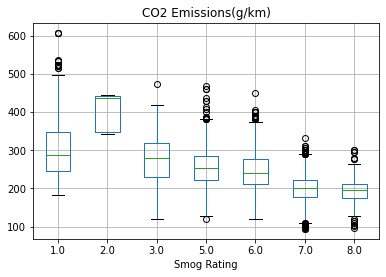

In [23]:
# Relation between CO2 emissions & smog rating?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Smog Rating')
plt.suptitle('')
plt.show()

# CO2 emissions decreases but there is significant overlap between different smog ratings

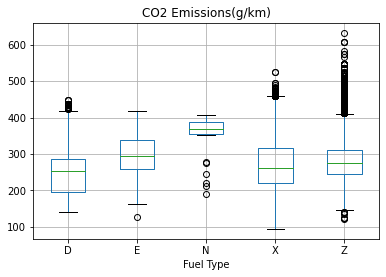

In [24]:
# Relation between CO2 emissions & fuel type?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Fuel Type')
plt.suptitle('')
plt.show()

# Not much difference between the fuel types. However, Z has many outliers. N seems to be consistently higher

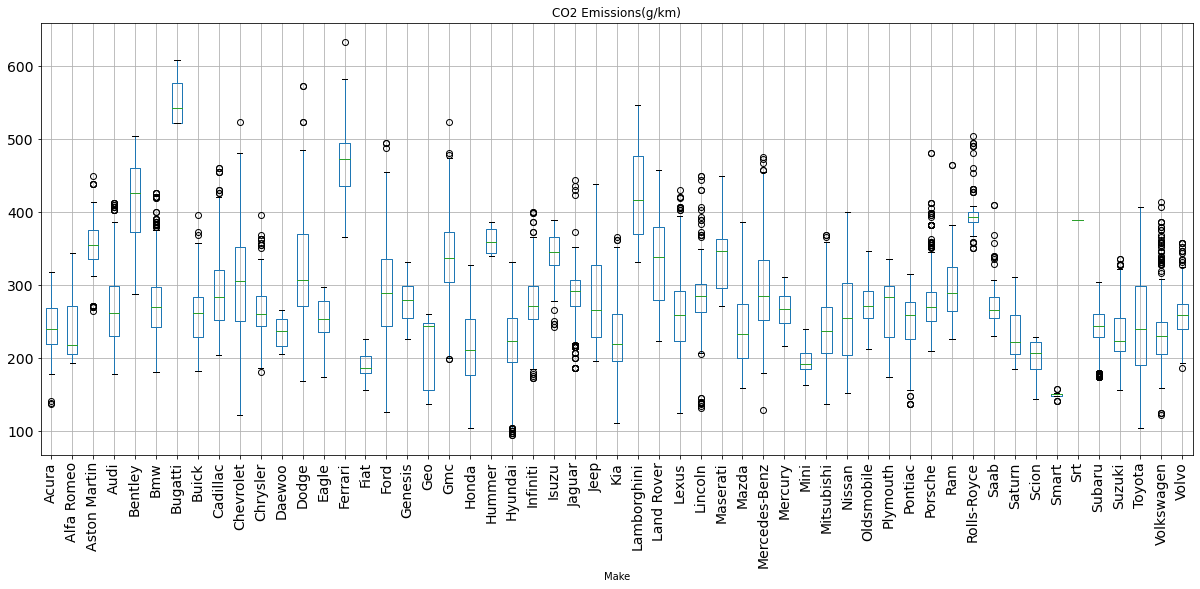

In [25]:
# Relation between car manufacturers & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Make', figsize = (20,8), fontsize = 14, rot = 90)
plt.suptitle('')
plt.show()

# Luxury cars have higher CO2 emissions

<AxesSubplot:>

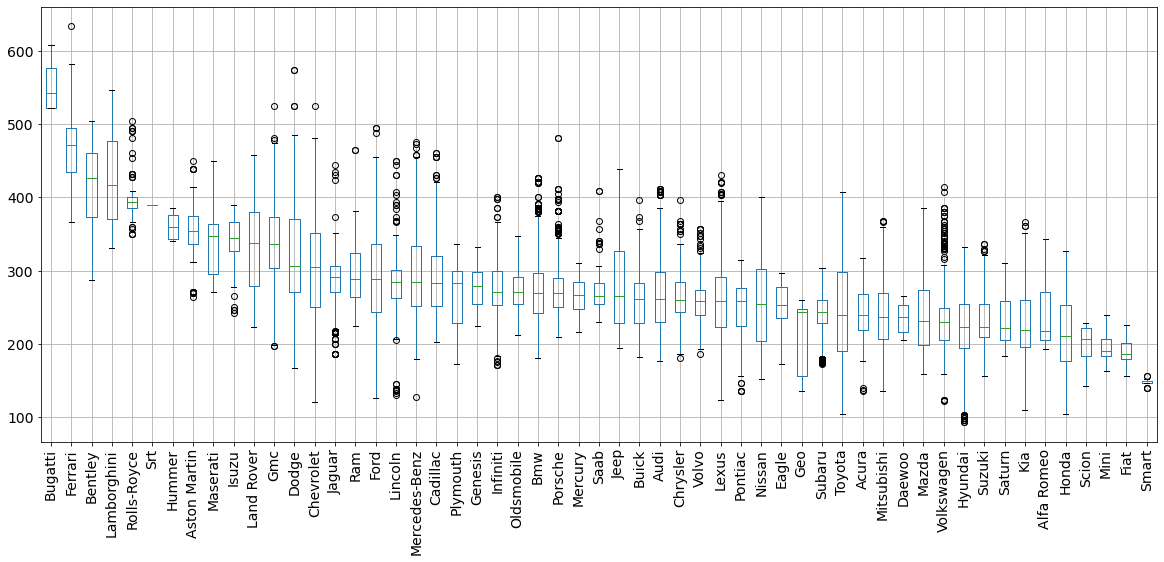

In [26]:
# Sort by median CO2 emissions to view better
# fuel.groupby(['Make','CO2 Emissions(g/km)'])
fuel_make = pd.DataFrame({col:vals['CO2 Emissions(g/km)'] for col, vals in fuel.groupby(['Make'])})
fuel_make[fuel_make.median().sort_values(ascending = False).index].boxplot(figsize = (20,8), fontsize = 14, rot = 90)

# High emissions
# Bugatti, Ferrari, RR, Lamborghini, Bentley - Luxury cars
# Isuzu, GMC - Pickup trucks

# Low emissions
# Fiat, Honda, Hyundai, Kia - Affordable vehicle brands

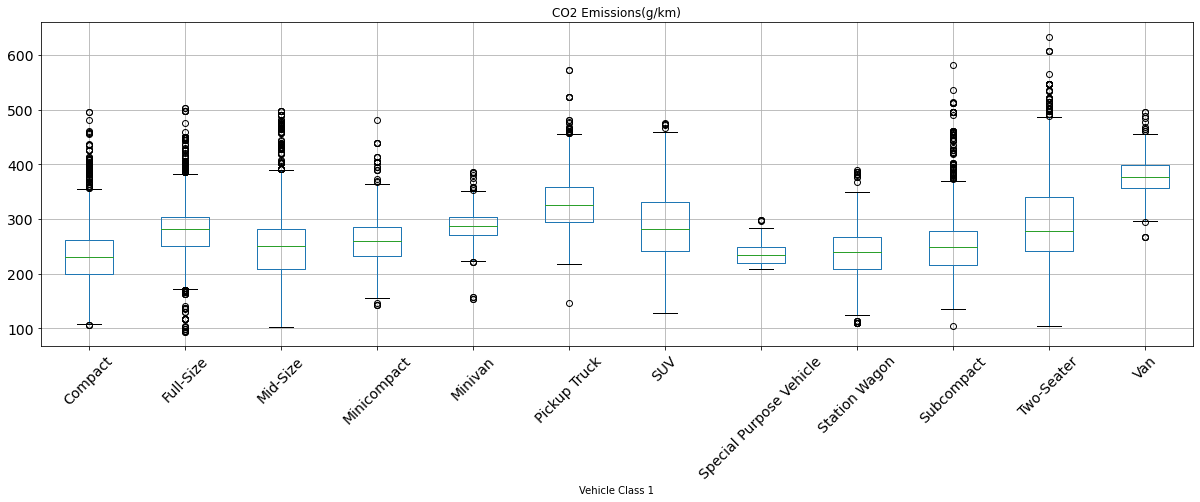

In [27]:
# Relation between vehicle type & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Vehicle Class 1', figsize = (20,6), fontsize = 14, rot = 45)
plt.suptitle('') 
plt.show()

# Not clear if any relation

<AxesSubplot:>

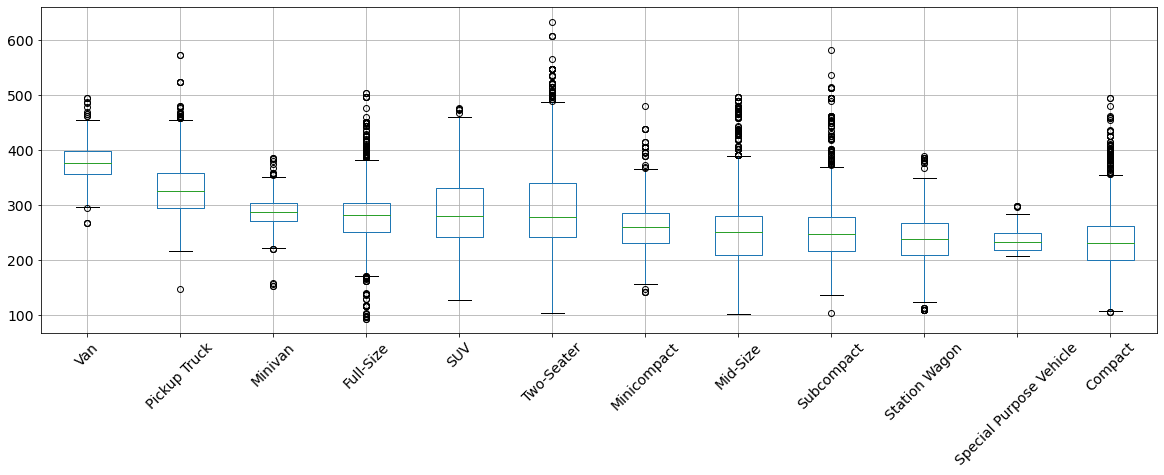

In [28]:
# Sort by median CO2 emissions to see better
# fuel.groupby(['Make','CO2 Emissions(g/km)'])
fuel_make = pd.DataFrame({col:vals['CO2 Emissions(g/km)'] for col, vals in fuel.groupby(['Vehicle Class 1'])})
fuel_make[fuel_make.median().sort_values(ascending = False).index].boxplot(figsize = (20,6), fontsize = 14, rot = 45)

# Vans, pickup trucks higher emissions

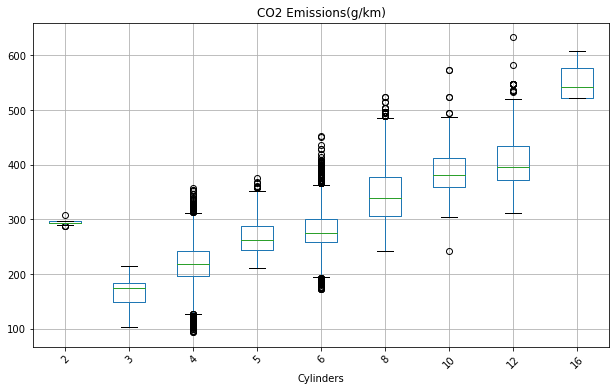

In [29]:
# Relation between # of cylinders & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Cylinders', figsize = (10,6), rot = 45)
plt.suptitle('')
plt.show()

# More the cylinders, more the emissions

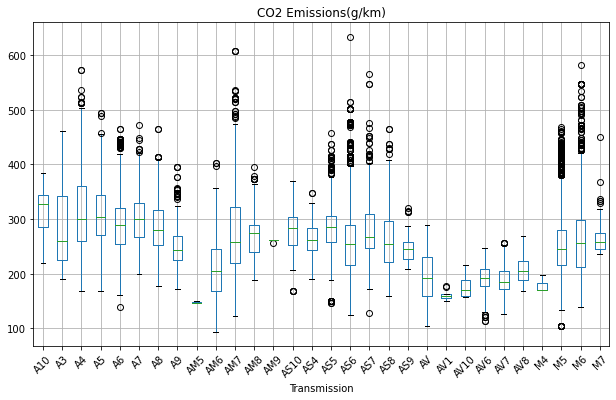

In [30]:
# Relation between transmission type & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Transmission', figsize = (10,6), rot = 45)
plt.suptitle('')
plt.show()

# Some transmissions (AV) have very low emissions
# A - Automated
# M - Manual
# AM - Automated Manual
# AV - CVT (Continuously Variable Transmission)

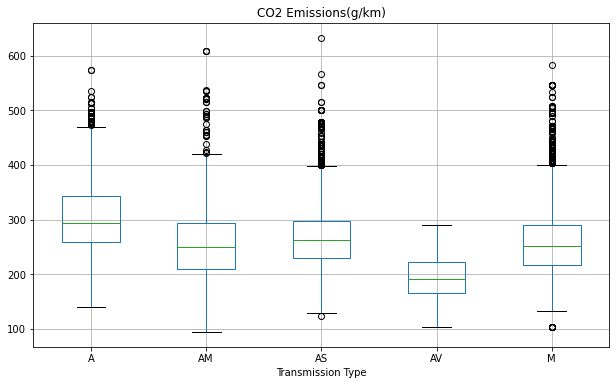

In [31]:
# Relation between transmission type group & CO2 emissions?
fuel.boxplot(column = 'CO2 Emissions(g/km)', by = 'Transmission Type', figsize = (10,6))
plt.suptitle('')
plt.show()

# Some transmissions (AV) have very low emissions

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

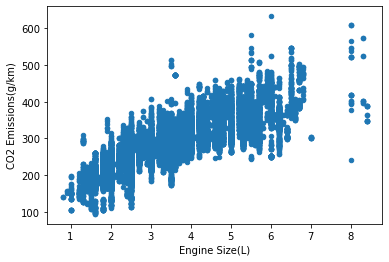

In [32]:
# Relation between engine size & CO2 emissions?
fuel[['CO2 Emissions(g/km)','Engine Size(L)']].plot.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)')

# As engine size increases, CO2 emissions increases as well

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

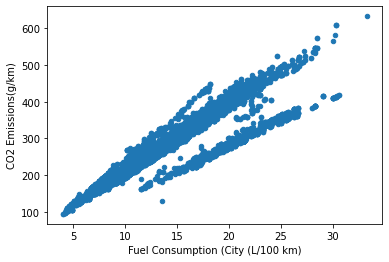

In [33]:
# Relation between fuel consumption (City) & CO2 emissions?
fuel.plot.scatter(x = 'Fuel Consumption (City (L/100 km)', y = 'CO2 Emissions(g/km)')

# As fuel consumption (City) increases, CO2 emissions increases as well
# What is the other trendline with lower slope about? (Try k-means clustering)

<AxesSubplot:xlabel='Fuel Consumption(Hwy (L/100 km))', ylabel='CO2 Emissions(g/km)'>

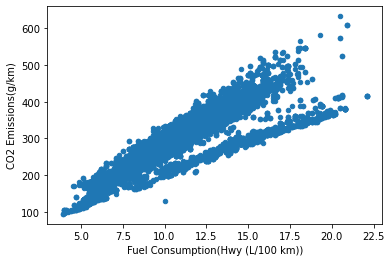

In [34]:
# Relation between fuel consumption (Highway) & CO2 emissions?
fuel.plot.scatter(x = 'Fuel Consumption(Hwy (L/100 km))', y = 'CO2 Emissions(g/km)')

# As fuel consumption (Hwy) increases, CO2 emissions increases as well

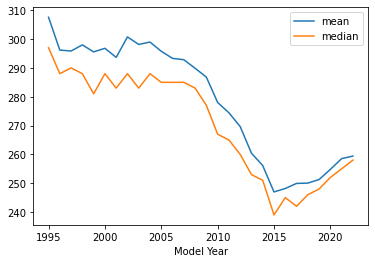

In [35]:
# Relation between model year & CO2 emissions?
fuel.groupby('Model Year')['CO2 Emissions(g/km)'].mean().plot(label = 'mean')
fuel.groupby('Model Year')['CO2 Emissions(g/km)'].median().plot(label = 'median').legend(loc = 'best')
plt.show()

# Mean & Median CO2 emissions have been decreasing since 1995 but have gone up since 2015 (maybe due to more big trucks & SUVs?)

In [36]:
# Correlations with CO2 emissions
fuel.corr()['CO2 Emissions(g/km)']

# Fuel consumption is highly positively correlated
# # of cylinders & Engine size are significantly correlated
# Exclude CO2 rating & Fuel Consumption (Comb) from the model

Model Year                          -0.279340
Engine Size(L)                       0.825534
Cylinders                            0.790384
Fuel Consumption (City (L/100 km)    0.929733
Fuel Consumption(Hwy (L/100 km))     0.907995
Fuel Consumption(Comb (L/100 km))    0.932461
Fuel Consumption(Comb (mpg))        -0.905091
CO2 Emissions(g/km)                  1.000000
CO2 Rating                          -0.948207
Smog Rating                         -0.444386
Name: CO2 Emissions(g/km), dtype: float64

In [37]:
# Correlations with Smog Rating
fuel.corr()['Smog Rating']
# We could do classification on smog rating as it doesn't seem to be correlated with other features

Model Year                          -0.067740
Engine Size(L)                      -0.389269
Cylinders                           -0.407188
Fuel Consumption (City (L/100 km)   -0.430058
Fuel Consumption(Hwy (L/100 km))    -0.372386
Fuel Consumption(Comb (L/100 km))   -0.416772
Fuel Consumption(Comb (mpg))         0.408217
CO2 Emissions(g/km)                 -0.444386
CO2 Rating                           0.447007
Smog Rating                          1.000000
Name: Smog Rating, dtype: float64

In [192]:
# Correlation matrix
fuel.corr().round(2)

fuel[['Model Year','Engine Size(L)','Cylinders','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))'\
      ,'CO2 Emissions(g/km)']] .corr().round(2)

# Highly correlated features:
# Engine size & cylinders
# Fuel consumption & CO2 emissions

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km)
Model Year,1.00,-0.05,-0.04,-0.25,-0.25,-0.28
Engine Size(L),-0.05,1.00,0.91,0.82,0.76,0.83
Cylinders,-0.04,0.91,1.00,0.79,0.70,0.79
Fuel Consumption (City (L/100 km),-0.25,0.82,0.79,1.00,0.95,0.93
Fuel Consumption(Hwy (L/100 km)),-0.25,0.76,0.70,0.95,1.00,0.91
CO2 Emissions(g/km),-0.28,0.83,0.79,0.93,0.91,1.00


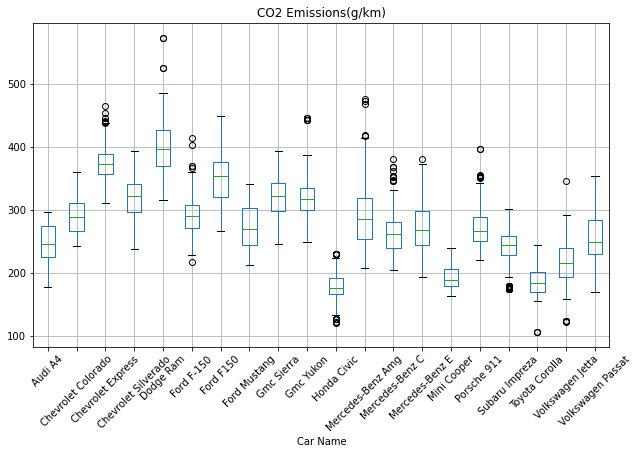

In [39]:
fuel[fuel['Car Name'].isin(fuel['Car Name'].value_counts()[:20].index.values)].boxplot(column = 'CO2 Emissions(g/km)', by = 'Car Name', figsize = (10,6), rot = 45)
plt.suptitle('')
plt.show()

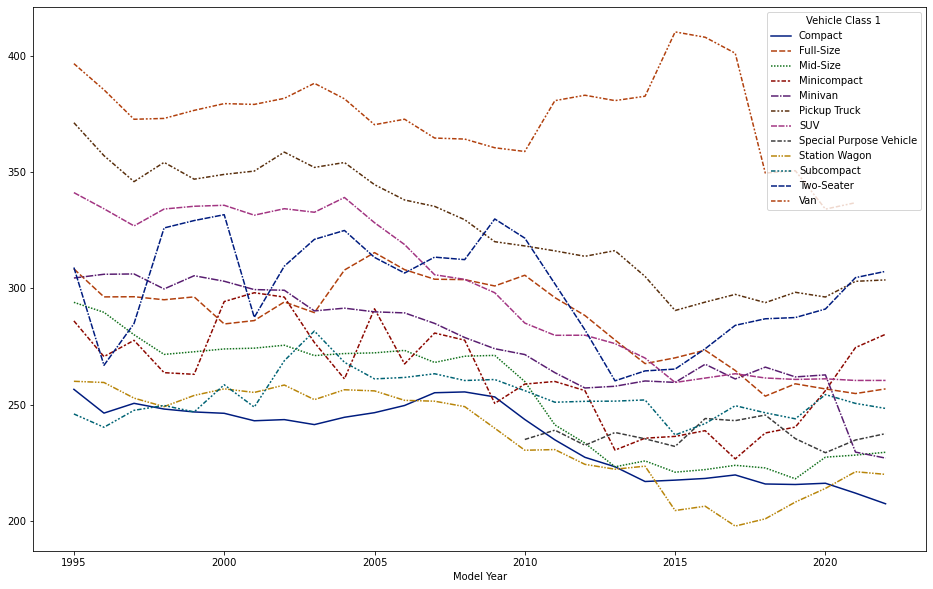

In [174]:
# Trend of vehicle classes
# fig, ax = plt.subplots(figsize = (16,10))
# sns.lineplot(ax = ax, data = pd.DataFrame(fuel.groupby(['Model Year','Vehicle Class 1'])['Vehicle Class 1'].size().unstack()),\
#             palette = 'dark')

# plt.show()

fig, ax = plt.subplots(figsize = (16,10))
sns.lineplot(ax = ax, data = pd.DataFrame(fuel.groupby(['Model Year','Vehicle Class 1'])['CO2 Emissions(g/km)'].mean().unstack()),\
            palette = 'dark')

plt.show()

# fig, ax = plt.subplots(figsize = (16,10))
# sns.lineplot(ax = ax, data = pd.DataFrame(fuel.groupby(['Model Year'])['CO2 Emissions(g/km)'].sum()),\
#             palette = 'dark')

# plt.show()

# SUVs have been manufactured a lot more in the past 10-15 years.
# Pickup Trucks have rebounded after a few down years from 2014-16.
# Compact, Mid-size & Vans have been decreasing in last 5-7 years.

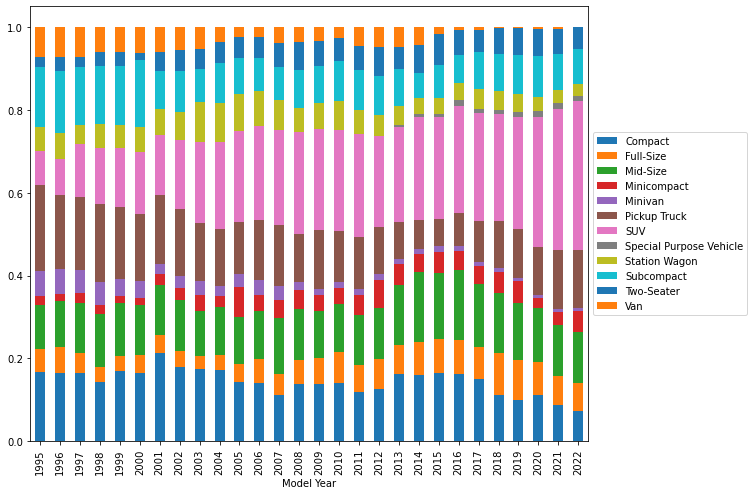

In [176]:
# 100% Stacked Column chart
fuel.groupby('Model Year')['Vehicle Class 1'].value_counts(normalize = True).\
unstack('Vehicle Class 1').plot.bar(stacked = True, figsize = (10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [41]:
# Drop unneccessary columns
cols_to_drop = ['Model', 'Vehicle Class', 'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', \
               'CO2 Rating', 'Smog Rating', 'Car Name']
fuel.drop(cols_to_drop, axis = 1, inplace = True)
fuel.columns

Index(['Model Year', 'Make', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption (City (L/100 km)',
       'Fuel Consumption(Hwy (L/100 km))', 'CO2 Emissions(g/km)',
       'Vehicle Class 1', 'Transmission Type'],
      dtype='object')

In [205]:
len(fuel['Make'].unique())

55

In [42]:
# Let's try boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from patsy import dmatrices

In [43]:
fuel.head()

,Model Year,Make,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),CO2 Emissions(g/km),Vehicle Class 1,Transmission Type
0,2022,Acura,2.4,4,AM8,Z,9.9,7.0,200,Compact,AM
1,2022,Acura,3.5,6,AS10,Z,12.6,9.4,263,SUV,AS
2,2022,Acura,2.0,4,AS10,Z,11.0,8.6,232,SUV,AS
3,2022,Acura,2.0,4,AS10,Z,11.3,9.1,242,SUV,AS
4,2022,Acura,2.0,4,AS10,Z,11.2,8.0,230,Compact,AS


## Baseline model
Let's create a baseline model with just the numeric features to see what the error is & if there's any scope for improvement

In [75]:
# Baseline model (only numeric features)
formula = 'Q("CO2 Emissions(g/km)") ~ Q("Model Year") + Q("Engine Size(L)") + Cylinders + \
 Q("Fuel Consumption (City (L/100 km)") + Q("Fuel Consumption(Hwy (L/100 km))")'
formula

'Q("CO2 Emissions(g/km)") ~ Q("Model Year") + Q("Engine Size(L)") + Cylinders +  Q("Fuel Consumption (City (L/100 km)") + Q("Fuel Consumption(Hwy (L/100 km))")'

In [76]:
# Create design matrices
Y, X = dmatrices(formula, fuel, return_type='dataframe')
y = Y['Q("CO2 Emissions(g/km)")'].values
X.head()

,Intercept,"Q(""Model Year"")","Q(""Engine Size(L)"")",Cylinders,"Q(""Fuel Consumption (City (L/100 km)"")","Q(""Fuel Consumption(Hwy (L/100 km))"")"
0,1.0,2022.0,2.4,4.0,9.9,7.0
1,1.0,2022.0,3.5,6.0,12.6,9.4
2,1.0,2022.0,2.0,4.0,11.0,8.6
3,1.0,2022.0,2.0,4.0,11.3,9.1
4,1.0,2022.0,2.0,4.0,11.2,8.0


In [77]:
# Column name change for XGBoost
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [78]:
# Create training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [126]:
# All the models we want to test out
models = {}

models['Random Forest'] = \
    RandomForestRegressor(n_estimators=10,
                           random_state=1)
models['Gradient Boosting'] = \
    GradientBoostingRegressor(n_estimators=100,
                               max_depth=2,
                               random_state=1)
models['XGBoost'] = XGBRegressor(random_state = 1)

In [127]:
# Fit models
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Random Forest
Fitting Gradient Boosting
Fitting XGBoost


In [128]:
# Accuracy scores
from sklearn import metrics
from math import sqrt

rmse_train = {}
rmse_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    rmse_train[name] = sqrt(metrics.mean_squared_error(y_train, prediction_train))
    prediction_test = model.predict(X_test)
    rmse_test[name] = sqrt(metrics.mean_squared_error(y_test, prediction_test))
    
df = pd.DataFrame({'Training RMSE':rmse_train, 'Test RMSE':rmse_test})
df

,Training RMSE,Test RMSE
Random Forest,1.086396,2.439698
Gradient Boosting,5.709668,5.754868
XGBoost,1.186042,1.659288


## Optimizing Boosting Models

In [208]:
# Formula for design matrices
formula = 'Q("CO2 Emissions(g/km)") ~ Q("Model Year") + Q("Engine Size(L)") + Cylinders + \
Q("Fuel Type") +Q("Fuel Consumption (City (L/100 km)") + Q("Fuel Consumption(Hwy (L/100 km))") + Q("Transmission Type")'
# + Q("Vehicle Class 1")
# + Make + Transmission'

formula

'Q("CO2 Emissions(g/km)") ~ Q("Model Year") + Q("Engine Size(L)") + Cylinders + Q("Fuel Type") +Q("Fuel Consumption (City (L/100 km)") + Q("Fuel Consumption(Hwy (L/100 km))") + Q("Transmission Type")'

In [209]:
# Create design matrices
Y, X = dmatrices(formula, fuel, return_type='dataframe')
y = Y['Q("CO2 Emissions(g/km)")'].values
X.head()

,Intercept,"Q(""Fuel Type"")[T.E]","Q(""Fuel Type"")[T.N]","Q(""Fuel Type"")[T.X]","Q(""Fuel Type"")[T.Z]","Q(""Transmission Type"")[T.AM]","Q(""Transmission Type"")[T.AS]","Q(""Transmission Type"")[T.AV]","Q(""Transmission Type"")[T.M]","Q(""Model Year"")","Q(""Engine Size(L)"")",Cylinders,"Q(""Fuel Consumption (City (L/100 km)"")","Q(""Fuel Consumption(Hwy (L/100 km))"")"
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022.0,2.4,4.0,9.9,7.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2022.0,3.5,6.0,12.6,9.4
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2022.0,2.0,4.0,11.0,8.6
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2022.0,2.0,4.0,11.3,9.1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2022.0,2.0,4.0,11.2,8.0


In [210]:
# Column name change for XGBoost
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [211]:
# Create training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [212]:
X_train.shape

(18301, 14)

In [145]:
# All the models we want to test out
models = {}

models['Random Forest'] = \
    RandomForestRegressor(n_estimators=10,
                           random_state=1)
models['Gradient Boosting'] = \
    GradientBoostingRegressor(n_estimators=100,
                               max_depth=2,
                               random_state=1)
models['XGBoost'] = XGBRegressor(random_state = 1)

In [146]:
# Fit models
for name, model in models.items():
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Random Forest
Fitting Gradient Boosting
Fitting XGBoost


In [147]:
# Accuracy scores
from sklearn import metrics
from math import sqrt

rmse_train = {}
rmse_test = {}
for name, model in models.items():
    prediction_train = model.predict(X_train)
    rmse_train[name] = sqrt(metrics.mean_squared_error(y_train, prediction_train))
    prediction_test = model.predict(X_test)
    rmse_test[name] = sqrt(metrics.mean_squared_error(y_test, prediction_test))
    
df = pd.DataFrame({'Training RMSE':rmse_train, 'Test RMSE':rmse_test})
df

,Training RMSE,Test RMSE
Random Forest,1.087324,2.507945
Gradient Boosting,5.725802,5.771359
XGBoost,1.154361,1.623720


In [148]:
from sklearn import model_selection
def cv_rmse_trees(X_train, y_train, num_trees, model_name = 'Gradient Boost'):
    
    if model_name == 'Gradient Boost':
        model = GradientBoostingRegressor(n_estimators=num_trees,
                                           max_depth=2,
                                           random_state=1)
    elif model_name == 'XGBoost':
        model = XGBRegressor(n_estimators = num_trees, random_state = 1)
        
    rmse_list = []
    
    kfold = model_selection.StratifiedKFold(n_splits=4, shuffle=True).split(X_train, y_train)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train_cv = X_train.iloc[train]
        X_holdout = X_train.iloc[holdout]
        y_train_cv = y_train[train]
        y_holdout = y_train[holdout]
        
        # Fit the model
        model.fit(X_train_cv, y_train_cv)
        # Compute test accuracy
        rmse = sqrt(metrics.mean_squared_error(y_holdout, model.predict(X_holdout)))
        rmse_list.append(rmse)
        
    
    average_rmse = pd.Series(rmse_list).mean()
    print('Fitted', num_trees)
#     print(model)
    return average_rmse

In [149]:
# Gradient Boosting optimization
# Let's optimize number of trees first

num_trees_range = [50, 100, 200, 300, 400]
scores = [cv_rmse_trees(X_train, y_train, num_trees) for num_trees in num_trees_range]

Fitted 50
Fitted 100
Fitted 200
Fitted 300
Fitted 400


Text(0, 0.5, 'RMSE')

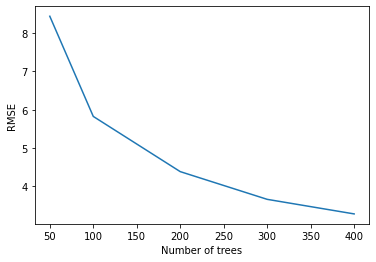

In [150]:
plt.plot(num_trees_range, scores)
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

# Around 300 trees seems to be enough

In [151]:
def cv_rmse_depth(X_train, y_train, depth, estimators = 300, model_name = 'Gradient Boost'):
    
    if model_name == 'Gradient Boost':
        model = GradientBoostingRegressor(n_estimators=estimators,
                                           max_depth=depth,
                                           random_state=1)
    elif model_name == 'XGBoost':
        model = XGBRegressor(n_estimators = estimators, max_depth = depth, random_state = 1)
        
    rmse_list = []
    
    kfold = model_selection.StratifiedKFold(n_splits=4, shuffle=True).split(X_train, y_train)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train_cv = X_train.iloc[train]
        X_holdout = X_train.iloc[holdout]
        y_train_cv = y_train[train]
        y_holdout = y_train[holdout]
        
        # Fit the model
        model.fit(X_train_cv, y_train_cv)
        # Compute test accuracy
        rmse = sqrt(metrics.mean_squared_error(y_holdout, model.predict(X_holdout)))
        rmse_list.append(rmse)
        
    
    average_rmse = pd.Series(rmse_list).mean()
    print('Fitted', depth)
    return average_rmse

Fitted 1
Fitted 2
Fitted 3
Fitted 4
Fitted 5
Fitted 6
Fitted 7
Fitted 8
Fitted 9
Fitted 10


Text(0, 0.5, 'RMSE')

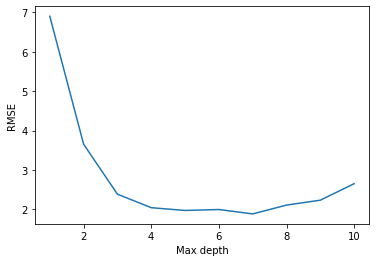

In [152]:
# Let's optimize max depth next

depth_range = [i for i in range(1,11)]
scores = [cv_rmse_depth(X_train, y_train, depth, 300) for depth in depth_range]
plt.plot(depth_range, scores)
plt.xlabel('Max depth')
plt.ylabel('RMSE')

# Max depth of 5 seems to be enough

In [153]:
# Best Gradient Boosting model
gbm_best = GradientBoostingRegressor(n_estimators=300,
                               max_depth=7,
                               random_state=1)
gbm_best.fit(X_train, y_train)
prediction_test = gbm_best.predict(X_test)
rmse_test = sqrt(metrics.mean_squared_error(y_test, prediction_test))
print('Test RMSE:',rmse_test)

Test RMSE: 1.3847991947525524


<AxesSubplot:>

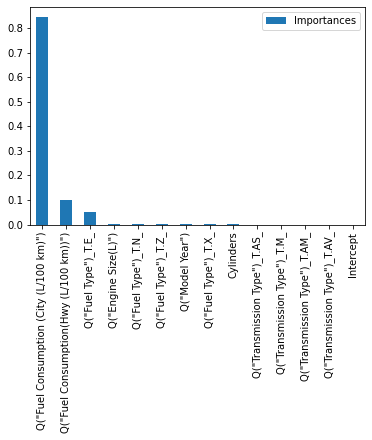

In [154]:
# Gradient Boosting feature importances
pd.DataFrame(index = X_train.columns, data = gbm_best.feature_importances_, columns = ['Importances']).\
sort_values(by = 'Importances', ascending = False)[:20].plot(kind = 'bar')

Fitted 50
Fitted 100
Fitted 200
Fitted 300
Fitted 400
Fitted 500
Fitted 600


Text(0, 0.5, 'RMSE')

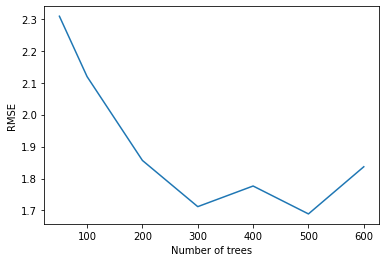

In [155]:
# XGBoost optimization
# Number of estimators first

num_trees_range = [50, 100, 200, 300, 400, 500, 600]
scores = [cv_rmse_trees(X_train, y_train, num_trees, 'XGBoost') for num_trees in num_trees_range]

plt.plot(num_trees_range, scores)
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

# Around 200 trees seems to be enough

Fitted 1
Fitted 2
Fitted 3
Fitted 4
Fitted 5
Fitted 6
Fitted 7
Fitted 8
Fitted 9
Fitted 10


Text(0, 0.5, 'RMSE')

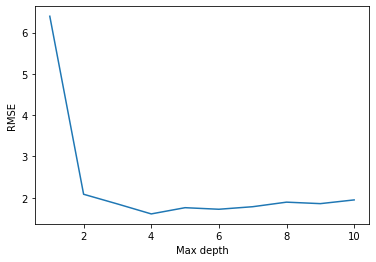

In [156]:
# Let's optimize max depth next

depth_range = [i for i in range(1,11)]
scores = [cv_rmse_depth(X_train, y_train, depth, 500, 'XGBoost') for depth in depth_range]
plt.plot(depth_range, scores)
plt.xlabel('Max depth')
plt.ylabel('RMSE')

# Max depth of 6 seems to be enough

In [157]:
# Best XGBoost model
xgb_best = XGBRegressor(n_estimators=500,
                               max_depth=4,
                               random_state=1)
xgb_best.fit(X_train, y_train)
prediction_test = xgb_best.predict(X_test)
rmse_test = sqrt(metrics.mean_squared_error(y_test, prediction_test))
print('Test RMSE:',rmse_test)

Test RMSE: 1.2989481024003626


<AxesSubplot:>

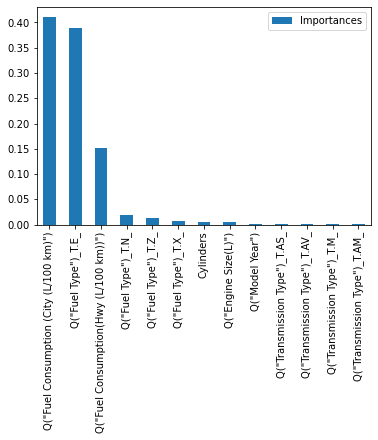

In [215]:
# XGBoost Feature Importances
pd.DataFrame(index = X_train.columns, data = xgb_best.feature_importances_, columns = ['Importances']).\
sort_values(by = 'Importances', ascending = False)[:13].plot(kind = 'bar')
# models['XGBoost'].feature_importances_

In [71]:
# Try clustering to group car brands
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
fuel.head()
numeric_cols = ['Model Year','Engine Size(L)','Cylinders','Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))']

In [74]:
# kmeans_data = fuel[['Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']].copy()
kmeans_data = fuel[numeric_cols].copy()
std_scaler = StandardScaler()
kmeans_data = std_scaler.fit_transform(kmeans_data.to_numpy())
kmeans_data[0:5]

array([[ 1.6106706 , -0.7110069 , -1.02558023, -1.06520025, -1.16755296],
       [ 1.6106706 ,  0.10894815,  0.08753344, -0.34368568, -0.24281398],
       [ 1.6106706 , -1.00917237, -1.02558023, -0.77124987, -0.55106031],
       [ 1.6106706 , -1.00917237, -1.02558023, -0.69108159, -0.35840636],
       [ 1.6106706 , -1.00917237, -1.02558023, -0.71780435, -0.78224505]])

# of clusters 1 done
# of clusters 2 done
# of clusters 3 done
# of clusters 4 done
# of clusters 5 done
# of clusters 6 done
# of clusters 7 done
# of clusters 8 done
# of clusters 9 done
# of clusters 10 done
# of clusters 11 done
# of clusters 12 done
# of clusters 13 done
# of clusters 14 done
# of clusters 15 done


Text(0, 0.5, 'Sum of distances of points to closest cluster centers')

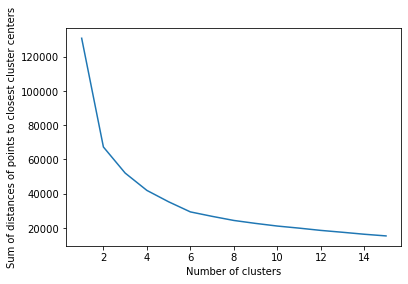

In [75]:
sum_of_distances = {}
for num_clusters in range(1,16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(kmeans_data)
    sum_of_distances[num_clusters] = kmeans.inertia_
    print('# of clusters',num_clusters,'done')
pd.Series(sum_of_distances).sort_index().plot()
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances of points to closest cluster centers')

# Looks like 6 clusters is best

In [89]:
# k-Means with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(kmeans_data)

KMeans(n_clusters=6, random_state=1)

In [90]:
# Do PCA to better visualize the 6 clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(kmeans_data)
pca_data

array([[-2.16320827,  1.36139177],
       [-0.39320249,  1.61575169],
       [-1.85625854,  1.21189981],
       ...,
       [-0.69905645, -1.48726843],
       [-0.77296145, -1.47518769],
       [-0.29690959, -1.58508739]])

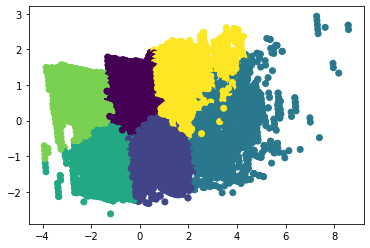

In [91]:
# kmeans_data = pd.DataFrame(std_scaler.inverse_transform(kmeans_data), columns = ['Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)'])
pca_data = pd.DataFrame(pca_data, columns = ['PC1','PC2'])
clusters = kmeans.predict(kmeans_data)
pca_data['Clusters'] = clusters
plt.scatter(data = pca_data, x = 'PC1', y = 'PC2', c = 'Clusters')